In [29]:
import matplotlib.pylab as plt
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Flatten,Dense,Dropout,MaxPooling2D
from keras.callbacks import ModelCheckpoint

(244, 244, 3)


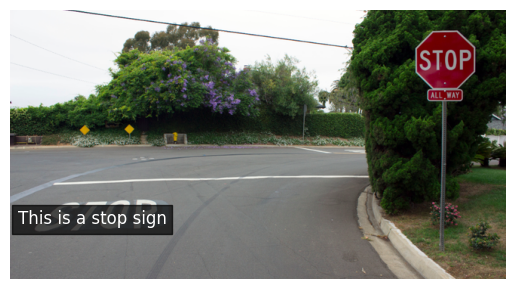

In [30]:
img1 =cv2.imread('C:/Users/nehal/Downloads/Compressed/New folder/training/stop/4.png')
img1= cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img1_resized = cv2.resize(img1, (244, 244))
img_1=height, width, channels = img1_resized.shape
print(img_1)
plt.imshow(img1)
label_text = "This is a stop sign"
plt.text(10, height + 40, label_text, fontsize=12, color='white',
             bbox=dict(facecolor='black', alpha=0.7))
plt.axis('off')  
plt.show()

(244, 244, 3)


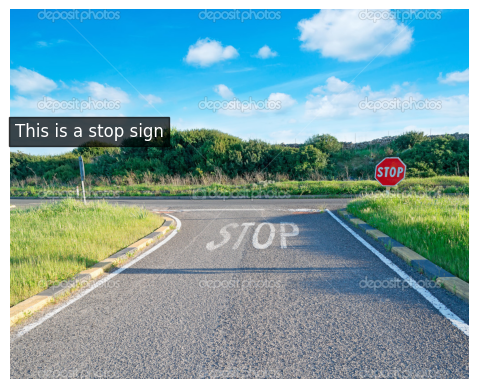

In [31]:
img2 =cv2.imread('C:/Users/nehal/Downloads/Compressed/New folder/training/stop/14.jpg')
img2= cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
img2_resized = cv2.resize(img2, (244, 244))
img_2=height, width, channels = img1_resized.shape
print(img_2)
plt.imshow(img2)
label_text = "This is a stop sign"
plt.text(10, height + 40, label_text, fontsize=12, color='white',
             bbox=dict(facecolor='black', alpha=0.7))
plt.axis('off')  
plt.show()

(244, 244, 3)


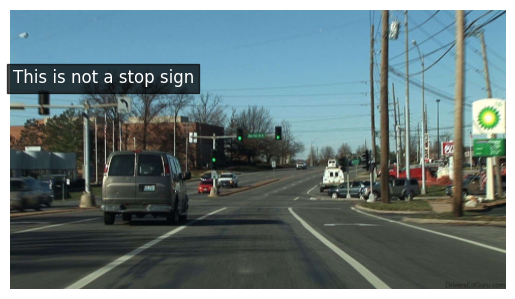

In [32]:
img3 =cv2.imread('C:/Users/nehal/Downloads/Compressed/New folder/training/not_stop/102.jpg')
img3= cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)
img3_resized = cv2.resize(img3, (244, 244))
img_3=height, width, channels = img3_resized.shape
print(img_3)
plt.imshow(img3)
label_text = "This is not a stop sign"
plt.text(10, height + 40, label_text, fontsize=12, color='white',
             bbox=dict(facecolor='black', alpha=0.7))
plt.axis('off')  
plt.show()

(244, 244, 3)


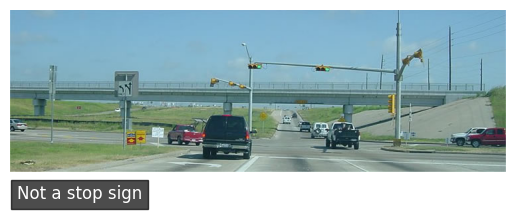

In [33]:
img4 =cv2.imread('C:/Users/nehal/Downloads/Compressed/New folder/training/not_stop/104.jpg')
img4= cv2.cvtColor(img4,cv2.COLOR_BGR2RGB)
img4_resized = cv2.resize(img4, (244, 244))
img_4=height, width, channels = img4_resized.shape
print(img_4)
plt.imshow(img4)
label_text = "Not a stop sign"
plt.text(10, height + 40, label_text, fontsize=12, color='white',
             bbox=dict(facecolor='black', alpha=0.7))
plt.axis('off')  
plt.show()

In [34]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)
        if os.path.isdir(subfolder_path):
            label = 1 if subfolder == 'stop' else 0  # 1 for 'stop', 0 for 'notstop'
            for filename in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, filename)
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (244, 244))  # Resize images to 244x244 pixels
                img = img / 255.0  # Normalize pixel values to [0, 1]
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

TRAINING VALIDATION AND TESTING[Different DATA-SET]

In [35]:
data_train ='C:/Users/nehal/Downloads/Compressed/New folder/training'

data_test ='C:/Users/nehal/Downloads/Compressed/New folder/testing'

In [36]:
X_train, y_train=load_images_from_folder(data_train)
#X_test, y_test=load_images_from_folder(data_test)

X_train, X_val, y_train, y_val=train_test_split(X_train,y_train,test_size=.20,random_state=42)

In [37]:
y_train=to_categorical(y_train, num_classes=2)
y_val=to_categorical(y_val,num_classes=2)
#y_test=to_categorical(y_test,num_classes=2)

Extra step  data augmentation

In [38]:
train_datagen =ImageDataGenerator(rotation_range=20,
                                  width_shift_range=0.2,
                                  shear_range=.20,
                                  zoom_range=.20,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

train_G=train_datagen.flow(X_train,y_train, batch_size=16)

In [39]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(244, 244, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer to reduce overfitting
model.add(Dense(2, activation='softmax'))  # Two output neurons for binary classification

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

# Create data generators for data augmentation (as shown in the previous code)

# Train the model with the callback
history = model.fit(
    train_G,
    epochs=12,  # Adjust the number of epochs as needed
    validation_data=(X_val, y_val),
    steps_per_epoch=len(X_train) // 32,  # Adjust batch size as needed
    verbose=1,
    callbacks=[model_checkpoint]
)



In [ ]:
print(best_model.summary())

In [ ]:
import os
import cv2
import numpy as np
from keras.models import load_model
from keras.utils import to_categorical

def load_images_from_folder(folder):
    images = []
    labels = []
    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)
        if os.path.isdir(subfolder_path):
            label = 1 if subfolder == 'stop' else 0  # 1 for 'stop', 0 for 'notstop'
            for filename in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, filename)
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (244, 244))  # Resize images to 244x244 pixels
                img = img / 255.0  # Normalize pixel values to [0, 1]
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

# Load the saved model
model = load_model('best_model.h5')

# Load the test dataset
test_folder = "C:/Users/nehal/Downloads/Compressed/New folder/testing"
X_test, y_test = load_images_from_folder(test_folder)

# Convert y_test to categorical
y_test_cat = to_categorical(y_test, num_classes=2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Loss: {loss}, Accuracy: {accuracy}")

# Make predictions if needed
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

In [43]:
import matplotlib.pyplot as plt

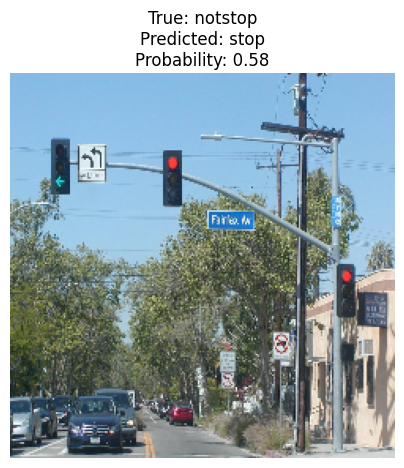

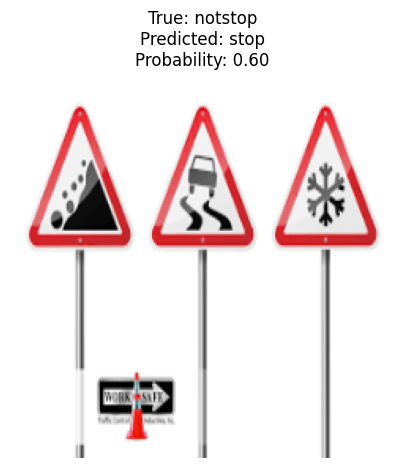

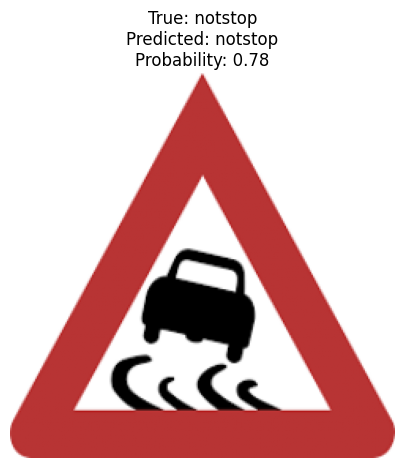

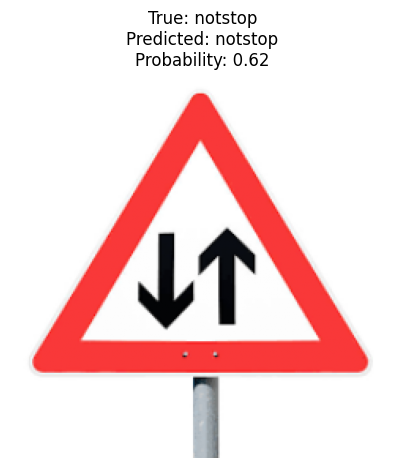

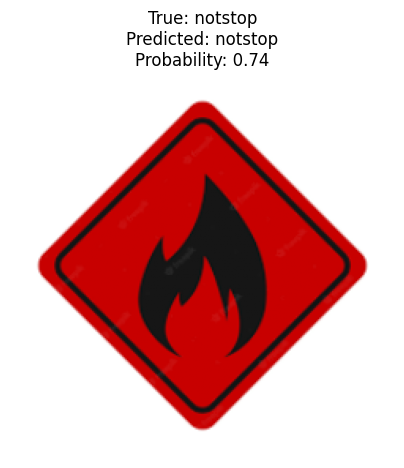

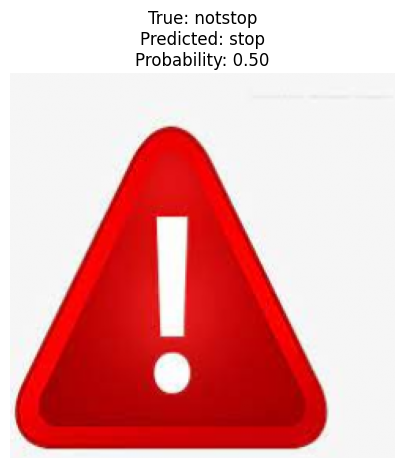

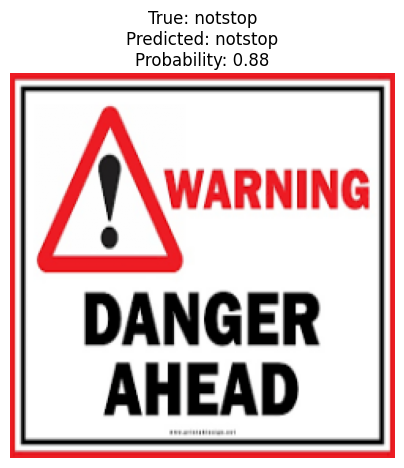

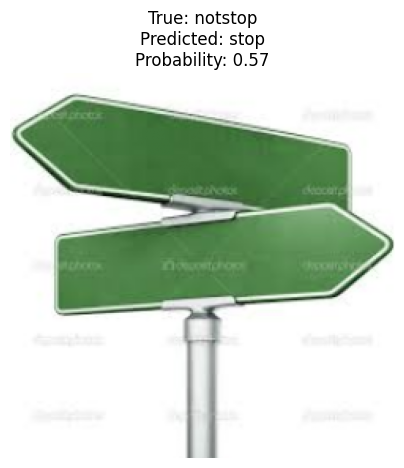

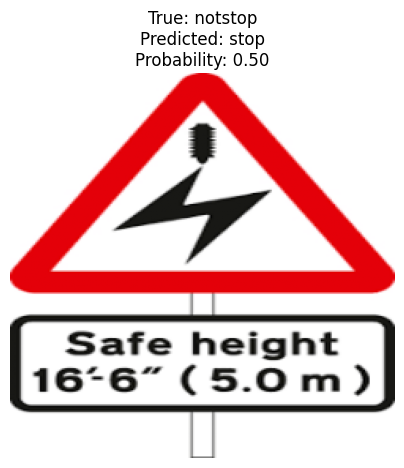

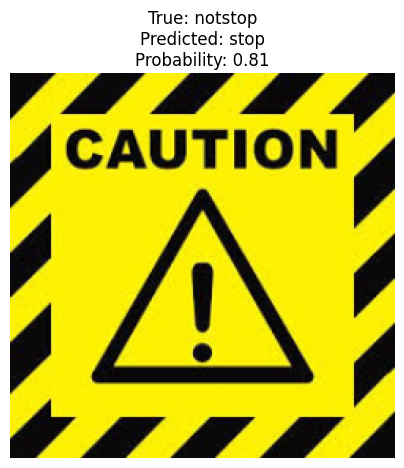

In [44]:
for idx, (img, true_label, pred_label, prediction) in enumerate(zip(X_test, y_test, predicted_labels, predictions)):
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.title(f"True: {'stop' if true_label == 1 else 'notstop'}\nPredicted: {'stop' if pred_label == 1 else 'notstop'}\nProbability: {prediction[pred_label]:.2f}")
    plt.axis('off')
    plt.show()
    if idx == 9:
        break

    

   